In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import imputation as imp
import importlib

%matplotlib inline

In [22]:
## read in the dataset
df = pd.read_csv('input/titanic.csv')

In [23]:
## first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [24]:
## null values in each columns
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [46]:
importlib.reload(imp)

<module 'imputation' from '/home/slothfulwave612/Documents/myPython/feature_engg_project_dir/imputation.py'>

In [26]:
## percentage null values in age, cabin and embarked columns
age_null = imp.per_null(df, 'Age')
cabin_null = imp.per_null(df, 'Cabin')
embrk_null = imp.per_null(df, 'Embarked')

print(f'Percentage of null values in Age column: {round(age_null, 5)}')
print(f'Percentage of null values in Cabin column: {round(cabin_null, 5)}')
print(f'Percentage of null values in Embarked column: {round(embrk_null, 5)}')

Percentage of null values in Age column: 0.19865
Percentage of null values in Cabin column: 0.77104
Percentage of null values in Embarked column: 0.00224


### Mean/Median/Mode Replacement

In [27]:
## three columns -- Survived, Age, Fare
temp_df = df.loc[:, ['Survived', 'Age', 'Fare']].copy()

In [28]:
## first few rows
temp_df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [29]:
temp_df.loc[888]

Survived     0.00
Age           NaN
Fare        23.45
Name: 888, dtype: float64

In [30]:
temp_df = imp.central_tendency_fill(temp_df, 'Age', 'median')

In [31]:
## 28 has been filled at Age_median
temp_df.loc[888]

Survived       0.00
Age             NaN
Fare          23.45
Age_median    28.00
Name: 888, dtype: float64

In [32]:
temp_df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


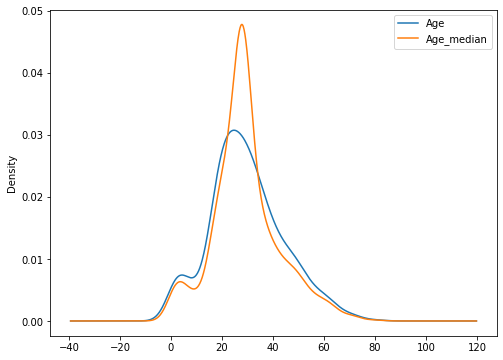

In [33]:
## difference between Age and Age_median
imp.plot_values(temp_df, ['Age', 'Age_median'])

In [34]:
## standard deviation for both columns
temp_df['Age'].std(), temp_df['Age_median'].std()

(14.526497332334044, 13.019696550973194)

### Random Sample Imputation

In [35]:
df = imp.random_imputation(temp_df, 'Age')

In [36]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


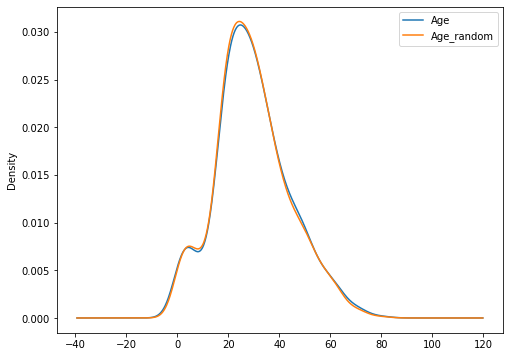

In [37]:
## random imputation is filling up the values perfectly
imp.plot_values(temp_df, ['Age', 'Age_random'])

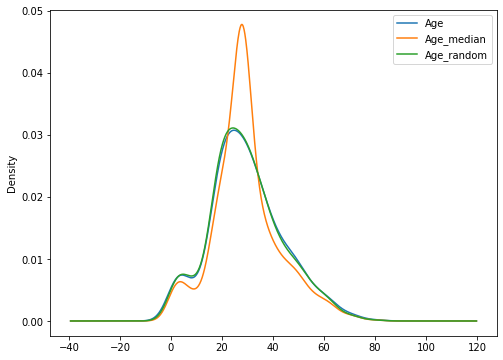

In [38]:
## random imputation better than meadian-replacement in this case
imp.plot_values(temp_df, ['Age', 'Age_median', 'Age_random'])

### Capturing NaN Values With A New Features

In [39]:
temp_df = imp.capture_nan(temp_df, 'Age')

In [40]:
temp_df.head(10)

,Survived,Age,Fare,Age_median,Age_random,Age_NaN
0,0,22.0,7.2500,22.0,22.0,0
1,1,38.0,71.2833,38.0,38.0,0
2,1,26.0,7.9250,26.0,26.0,0
3,1,35.0,53.1000,35.0,35.0,0
4,0,35.0,8.0500,35.0,35.0,0
5,0,NaN,8.4583,28.0,42.0,1
6,0,54.0,51.8625,54.0,54.0,0
7,0,2.0,21.0750,2.0,2.0,0
8,1,27.0,11.1333,27.0,27.0,0
9,1,14.0,30.0708,14.0,14.0,0


### End of Distribution Imputation

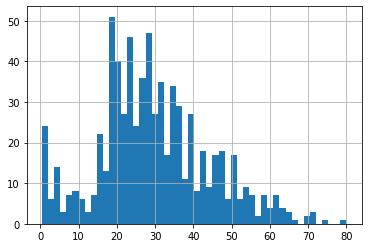

In [50]:
temp_df['Age'].hist(bins=50)

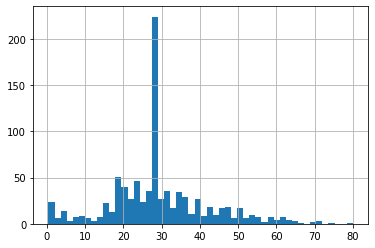

In [49]:
temp_df['Age_median'].hist(bins=50)

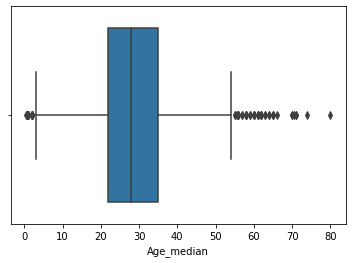

In [51]:
sns.boxplot(x='Age_median', data=temp_df)

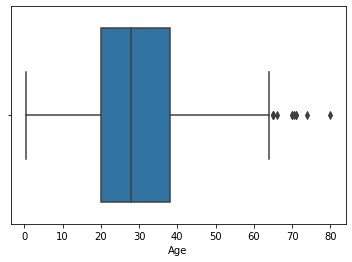

In [52]:
sns.boxplot(x='Age', data=temp_df)

In [54]:
temp_df = imp.end_of_dist(df, 'Age')

In [55]:
temp_df.head()

,Survived,Age,Fare,Age_median,Age_random,Age_NaN,Age_end_of_dist
0,0,22.0,7.2500,22.0,22.0,0,22.0
1,1,38.0,71.2833,38.0,38.0,0,38.0
2,1,26.0,7.9250,26.0,26.0,0,26.0
3,1,35.0,53.1000,35.0,35.0,0,35.0
4,0,35.0,8.0500,35.0,35.0,0,35.0


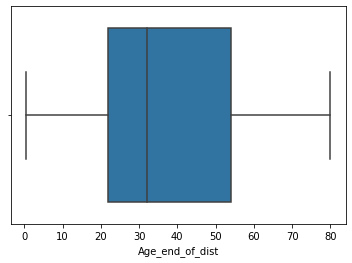

In [56]:
sns.boxplot(x='Age_end_of_dist', data=temp_df)

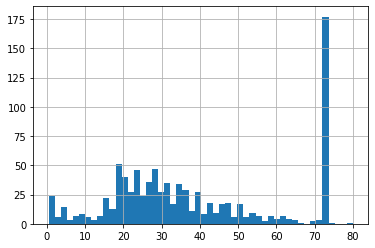

In [57]:
temp_df['Age_end_of_dist'].hist(bins=50)